In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/clickbait_clean.csv')
data.head()

,headline,clickbait
0,should i get bings,1
1,which tv female friend group do you belong in,1
2,the new star wars the force awakens trailer is...,1
3,this vine of new york on celebrity big brother...,1
4,a couple did a stunning photo shoot with their...,1


In [5]:
headline = data['headline'].values
clickbait = data[['clickbait']].values

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_word = 6000
tokenizer = Tokenizer(num_words=max_word, oov_token='x')
tokenizer.fit_on_texts(headline)

text_sequences = tokenizer.texts_to_sequences(headline);
X = pad_sequences(text_sequences)
print('Shape of text tensor:', X.shape)

y = clickbait
print('Shape of label tensor:', y.shape)

Shape of text tensor: (32000, 26)
Shape of label tensor: (32000, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(28800, 26) (28800, 1)
(3200, 26) (3200, 1)


In [8]:
from keras.callbacks import EarlyStopping
cb = [EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.01)]

## **GRU**

In [9]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_word, output_dim=16),
    tf.keras.layers.GRU(128, return_sequences = False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          96000     
                                                                 
 gru (GRU)                   (None, 128)               56064     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 164,545
Trainable params: 164,545
Non-trai

In [11]:
%%time
num_epoch = 100
history = model.fit(X_train, y_train, epochs=num_epoch,
                    validation_data=(X_test, y_test), callbacks=cb, verbose=2)

Epoch 1/100
900/900 - 14s - loss: 0.6926 - accuracy: 0.5217 - val_loss: 0.6919 - val_accuracy: 0.5381 - 14s/epoch - 16ms/step
Epoch 2/100
900/900 - 12s - loss: 0.6915 - accuracy: 0.5497 - val_loss: 0.6903 - val_accuracy: 0.5738 - 12s/epoch - 13ms/step
Epoch 3/100
900/900 - 12s - loss: 0.6897 - accuracy: 0.5675 - val_loss: 0.6876 - val_accuracy: 0.6428 - 12s/epoch - 13ms/step
Epoch 4/100
900/900 - 12s - loss: 0.6860 - accuracy: 0.5910 - val_loss: 0.6821 - val_accuracy: 0.6441 - 12s/epoch - 13ms/step
Epoch 5/100
900/900 - 12s - loss: 0.6780 - accuracy: 0.6111 - val_loss: 0.6696 - val_accuracy: 0.6559 - 12s/epoch - 13ms/step
Epoch 6/100
900/900 - 12s - loss: 0.6583 - accuracy: 0.6479 - val_loss: 0.6326 - val_accuracy: 0.6581 - 12s/epoch - 13ms/step
Epoch 7/100
900/900 - 12s - loss: 0.5735 - accuracy: 0.7308 - val_loss: 0.4393 - val_accuracy: 0.8322 - 12s/epoch - 13ms/step
Epoch 8/100
900/900 - 12s - loss: 0.3792 - accuracy: 0.8452 - val_loss: 0.2658 - val_accuracy: 0.9000 - 12s/epoch - 13

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=model.predict(X_test) 

cm = confusion_matrix(y_test, y_pred.round())
print(cm)

100/100 [==============================] - 1s 5ms/step
[[1546   54]
 [  37 1563]]


In [13]:
print('Accuracy:', accuracy_score(y_test, y_pred.round()))

Accuracy: 0.9715625


In [14]:
cr = classification_report(y_test, y_pred.round())
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1600
           1       0.97      0.98      0.97      1600

    accuracy                           0.97      3200
   macro avg       0.97      0.97      0.97      3200
weighted avg       0.97      0.97      0.97      3200



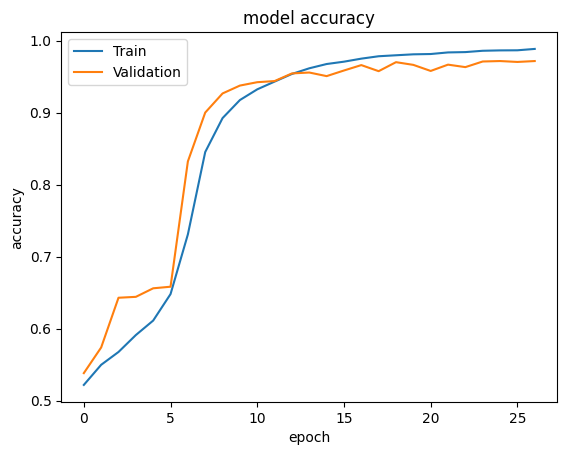

In [15]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **LSTM**

In [16]:
import tensorflow as tf
from keras.layers import LSTM
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_word, output_dim=16),
    tf.keras.layers.LSTM(128,  return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          96000     
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 182,721
Trainable params: 182,721
Non-tr

In [18]:
%%time
num_epoch = 100
history_2 = model_2.fit(X_train, y_train, epochs=num_epoch,
                    validation_data=(X_test, y_test), callbacks=cb, verbose=2)

Epoch 1/100
900/900 - 16s - loss: 0.6924 - accuracy: 0.5405 - val_loss: 0.6913 - val_accuracy: 0.5337 - 16s/epoch - 17ms/step
Epoch 2/100
900/900 - 13s - loss: 0.6902 - accuracy: 0.5995 - val_loss: 0.6880 - val_accuracy: 0.6569 - 13s/epoch - 15ms/step
Epoch 3/100
900/900 - 13s - loss: 0.6841 - accuracy: 0.6561 - val_loss: 0.6764 - val_accuracy: 0.7241 - 13s/epoch - 15ms/step
Epoch 4/100
900/900 - 13s - loss: 0.6558 - accuracy: 0.7101 - val_loss: 0.6111 - val_accuracy: 0.7300 - 13s/epoch - 15ms/step
Epoch 5/100
900/900 - 13s - loss: 0.5590 - accuracy: 0.7406 - val_loss: 0.4757 - val_accuracy: 0.7884 - 13s/epoch - 15ms/step
Epoch 6/100
900/900 - 13s - loss: 0.4162 - accuracy: 0.8253 - val_loss: 0.3399 - val_accuracy: 0.8578 - 13s/epoch - 15ms/step
Epoch 7/100
900/900 - 13s - loss: 0.2658 - accuracy: 0.9006 - val_loss: 0.1895 - val_accuracy: 0.9259 - 13s/epoch - 15ms/step
Epoch 8/100
900/900 - 13s - loss: 0.1941 - accuracy: 0.9305 - val_loss: 0.1660 - val_accuracy: 0.9419 - 13s/epoch - 15

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred2=model_2.predict(X_test) 

cm = confusion_matrix(y_test, y_pred2.round())
print(cm)

100/100 [==============================] - 1s 6ms/step
[[1564   36]
 [  74 1526]]


In [20]:
print('Accuracy:', accuracy_score(y_test, y_pred2.round()))

Accuracy: 0.965625


In [21]:
cr = classification_report(y_test, y_pred2.round())
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1600
           1       0.98      0.95      0.97      1600

    accuracy                           0.97      3200
   macro avg       0.97      0.97      0.97      3200
weighted avg       0.97      0.97      0.97      3200



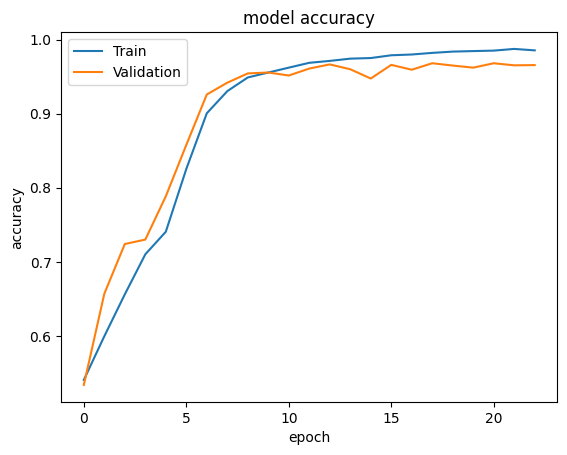

In [22]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Bi-LSTM**

In [23]:
import tensorflow as tf
from keras.layers import LSTM
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_word, output_dim=16),
    tf.keras.layers.Bidirectional(LSTM(128,  return_sequences=False)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          96000     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                      

In [25]:
%%time
num_epoch = 100
history_3 = model_3.fit(X_train, y_train, epochs=num_epoch,
                    validation_data=(X_test, y_test), callbacks=cb, verbose=2)

Epoch 1/100
900/900 - 23s - loss: 0.6924 - accuracy: 0.5397 - val_loss: 0.6915 - val_accuracy: 0.5678 - 23s/epoch - 25ms/step
Epoch 2/100
900/900 - 19s - loss: 0.6904 - accuracy: 0.5818 - val_loss: 0.6884 - val_accuracy: 0.6612 - 19s/epoch - 21ms/step
Epoch 3/100
900/900 - 19s - loss: 0.6844 - accuracy: 0.6582 - val_loss: 0.6766 - val_accuracy: 0.7266 - 19s/epoch - 21ms/step
Epoch 4/100
900/900 - 19s - loss: 0.6530 - accuracy: 0.7083 - val_loss: 0.6032 - val_accuracy: 0.7244 - 19s/epoch - 21ms/step
Epoch 5/100
900/900 - 21s - loss: 0.5521 - accuracy: 0.7424 - val_loss: 0.4681 - val_accuracy: 0.7884 - 21s/epoch - 23ms/step
Epoch 6/100
900/900 - 21s - loss: 0.4188 - accuracy: 0.8235 - val_loss: 0.3668 - val_accuracy: 0.8256 - 21s/epoch - 23ms/step
Epoch 7/100
900/900 - 19s - loss: 0.2721 - accuracy: 0.8984 - val_loss: 0.2032 - val_accuracy: 0.9237 - 19s/epoch - 21ms/step
Epoch 8/100
900/900 - 19s - loss: 0.1949 - accuracy: 0.9302 - val_loss: 0.1533 - val_accuracy: 0.9406 - 19s/epoch - 21

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred3=model_3.predict(X_test) 

cm = confusion_matrix(y_test, y_pred3.round())
print(cm)

100/100 [==============================] - 2s 10ms/step
[[1559   41]
 [  59 1541]]


In [27]:
print('Accuracy:', accuracy_score(y_test, y_pred3.round()))

Accuracy: 0.96875


In [28]:
cr = classification_report(y_test, y_pred3.round())
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1600
           1       0.97      0.96      0.97      1600

    accuracy                           0.97      3200
   macro avg       0.97      0.97      0.97      3200
weighted avg       0.97      0.97      0.97      3200



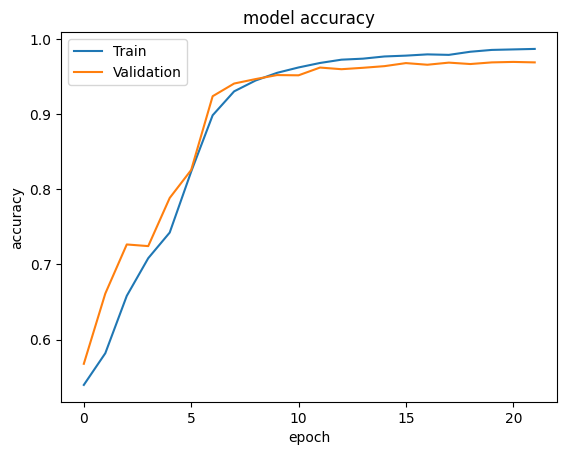

In [29]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

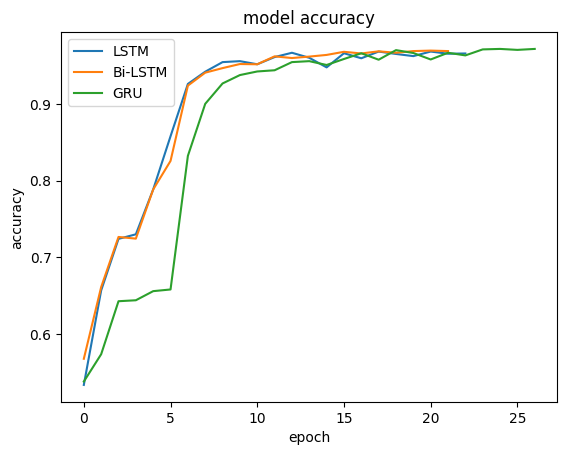

In [31]:
# summarize history for accuracy
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LSTM', 'Bi-LSTM', 'GRU'], loc='upper left')
plt.show()